In [10]:
#find data at:
#https://www.kaggle.com/hugomathien/soccer/data#
#https://footystats.org/download-stats-csv
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
con = sqlite3.connect("database.sqlite")

In [11]:
#get data from sql and csv
player_data = pd.read_sql_query("SELECT player_api_id,player_name, height,weight FROM Player;", con)
position_data = pd.read_csv("england-premier-league-players-2018-to-2019-stats.csv")
con.close()


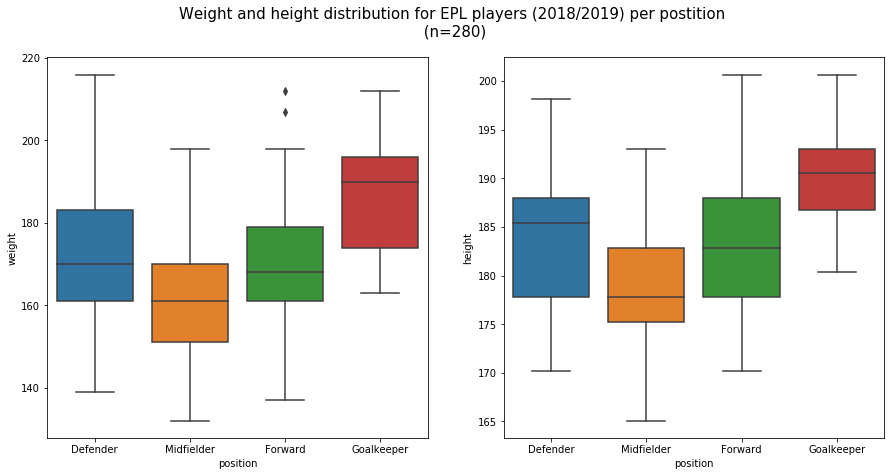

In [15]:
#rename columns and merge 
position_data = position_data[["full_name", "position", "age"]]
player = player_data.rename(columns={"player_name":"full_name"})
data = pd.merge(position_data, player,on="full_name")
#plot
fig, axs = plt.subplots(ncols=2,figsize=(15,7))
sns.boxplot(x="position", y="weight", data=data,ax=axs[0])
sns.boxplot(x="position", y="height", data=data,ax=axs[1])
fig.suptitle("Weight and height distribution for EPL players (2018/2019) per postition\n (n=%.0f)"%len(data), size=15)
plt.show()